In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [58]:
model = tf.keras.models.load_model('trained_model_PDD')

In [60]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear"
)

Found 17573 files belonging to 38 classes.


In [62]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [66]:
image = tf.keras.preprocessing.image.load_img("test/test/TomatoEarlyBlight4.JPG",target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 232ms/step


In [68]:
print(predictions)

[[4.5475335e-15 5.0541329e-15 6.8902356e-14 6.7899907e-13 1.7347350e-16
  2.4938196e-16 8.8606619e-18 3.1443134e-14 2.1703419e-15 8.1551485e-15
  1.2663398e-16 3.2274045e-11 3.4632777e-08 1.0683027e-13 3.6266194e-15
  7.9906399e-16 1.7250567e-13 1.3129787e-15 3.6230697e-13 3.5359644e-16
  9.1264116e-13 2.4980322e-09 7.5282560e-14 7.3787533e-16 4.3994021e-17
  1.5603788e-15 2.5785290e-12 1.0503648e-17 3.7559245e-09 9.9992514e-01
  7.4785508e-05 4.9553600e-10 1.1790682e-10 4.5358698e-13 1.0195927e-11
  3.7954570e-11 9.6984812e-13 5.0594792e-14]]


In [70]:
result_index = np.argmax(predictions) 
print(result_index)

29


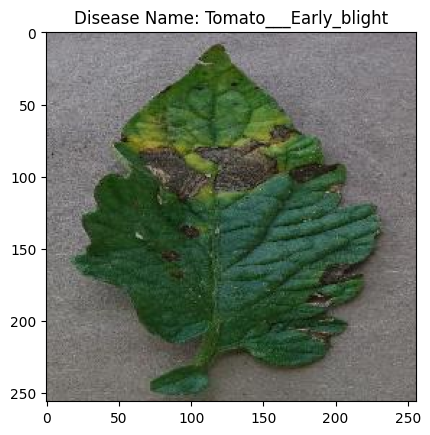

In [72]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.show()

In [15]:
model.save('train_model.h5')